In [1]:
import os
os.chdir("../")

In [12]:
from auto_call_strategy import AutoCallStrategy
from back_tester import BackTester
from utils.book import Book
from datetime import datetime
from utils.instruments import AutoCallInstrument
from utils.ledger import ProductLedger
from utils.market_data_reader import MarketDataReader

from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

In [3]:
data = MarketDataReader.load_market_data("600048", datetime(2021, 5, 10), datetime(2021, 8, 10))
strategy1 = AutoCallStrategy(100000, '1d')
strategy2 = AutoCallStrategy(50000, '1d')
strategy3 = AutoCallStrategy(30000, '1d')
book = Book.init_book(
    ProductLedger("", AutoCallInstrument("600048", data), 1)
)
result1 = BackTester(book).run(strategy1)
result2 = BackTester(book).run(strategy2)
result3 = BackTester(book).run(strategy3)

Start loading data
Starting to run backtest AUTO_CALL_HEDGE_100000
Starting to run backtest AUTO_CALL_HEDGE_50000
Starting to run backtest AUTO_CALL_HEDGE_30000


In [4]:
ts = list(result1.index.strftime("%Y-%m-%d %H:%M:%S"))
xticks = list(range(0, len(ts), 1920))

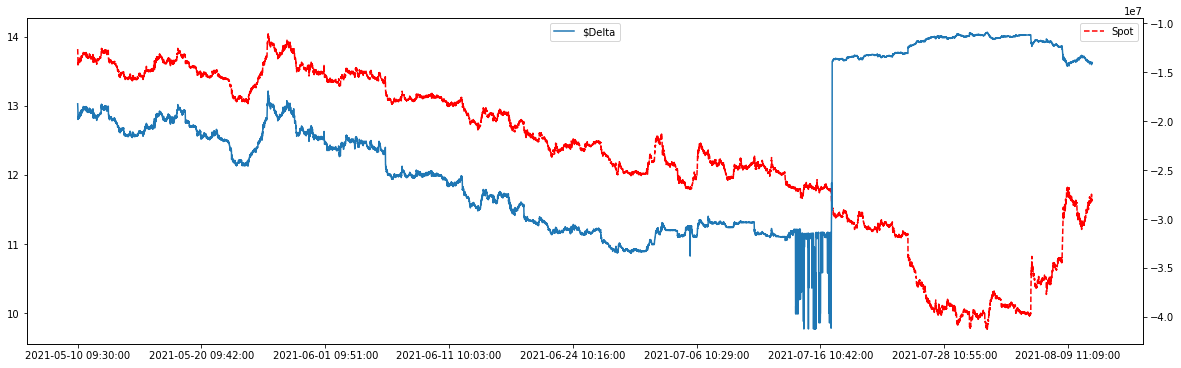

In [5]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.plot(ts, result1['close'], '--', color='r', label='Spot')
ax.legend(loc=0)
ax2 = ax.twinx()
ax2.plot(ts, result1['delta'], '-', label='$Delta')
ax2.legend(loc=9)
ax.set_xticks(xticks)
ax2.set_xticks(xticks);

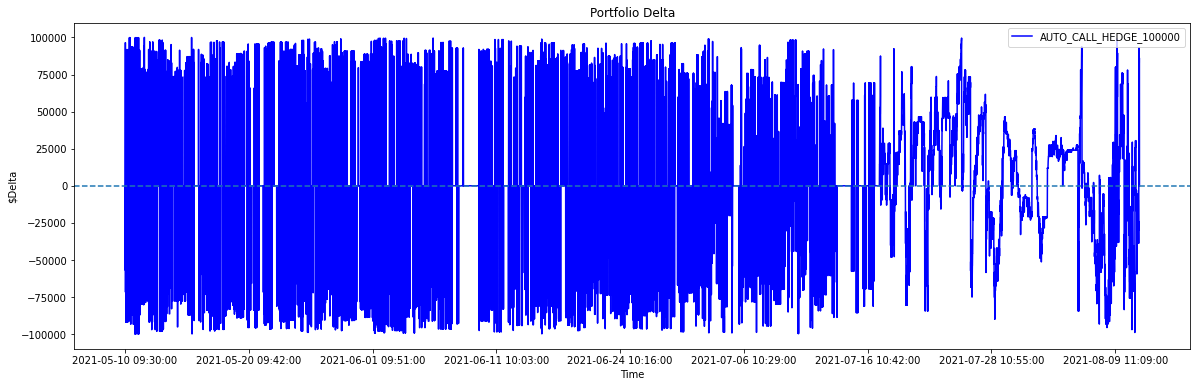

In [6]:
fig = plt.figure(figsize=(20, 6))
plt.title("Portfolio Delta")
plt.plot(ts, result1[strategy1.tag_delta()] ,'b', label=str(strategy1))
#plt.plot(ts, result2[strategy2.tag_delta()], 'r', label=str(strategy2))
#plt.plot(result3.index, result3[strategy3.tag_delta()], 'g', label=str(strategy3))
plt.axhline(0, linestyle='--')
plt.xlabel("Time")
plt.ylabel("$Delta")
plt.xticks(xticks)
plt.legend();

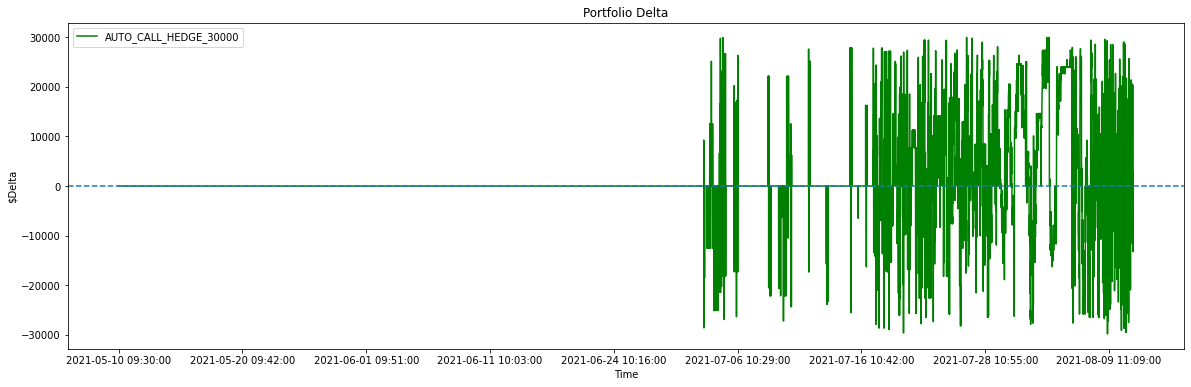

In [7]:
fig = plt.figure(figsize=(20, 6))
plt.title("Portfolio Delta")
#plt.plot(result1.index, result1[strategy1.tag_delta()] ,'b', label=str(strategy1))
#plt.plot(ts, result2[strategy2.tag_delta()], 'r', label=str(strategy2))
plt.plot(ts, result3[strategy3.tag_delta()], 'g', label=str(strategy3))
plt.axhline(0, linestyle='--')
plt.xlabel("Time")
plt.ylabel("$Delta")
plt.xticks(xticks)
plt.legend();

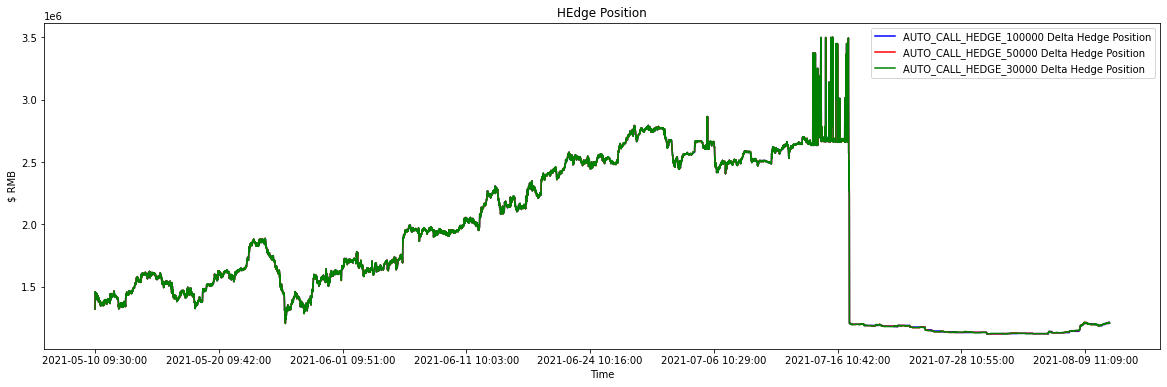

In [8]:
plt.figure(figsize=(20, 6))
plt.title("HEdge Position")
plt.plot(ts, result1[strategy1.tag_hedge_position()] ,'b', label = strategy1.tag_hedge_position())
plt.plot(ts, result2[strategy2.tag_hedge_position()], 'r', label = strategy2.tag_hedge_position())
plt.plot(ts, result3[strategy3.tag_hedge_position()], 'g', label = strategy3.tag_hedge_position())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.xticks(xticks)
plt.legend();

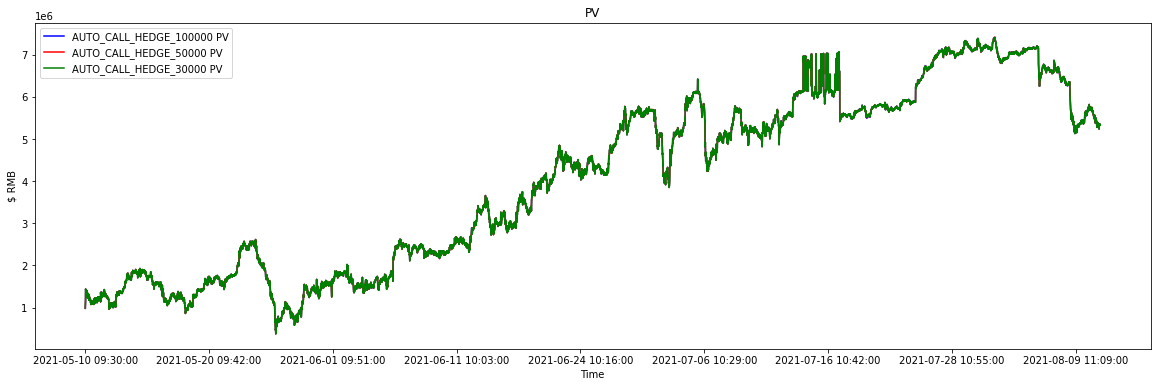

In [9]:
plt.figure(figsize=(20, 6))
plt.title("PV")
plt.plot(ts, result1[strategy1.tag_pv()] ,'b', label = strategy1.tag_pv())
plt.plot(ts, result2[strategy2.tag_pv()], 'r', label = strategy2.tag_pv())
plt.plot(ts, result3[strategy3.tag_pv()], 'g', label = strategy3.tag_pv())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.legend()
plt.xticks(xticks);

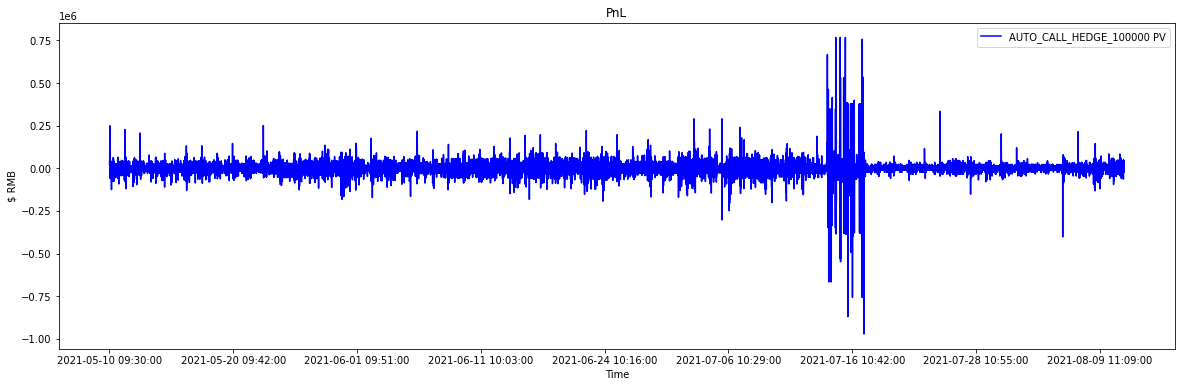

In [10]:
plt.figure(figsize=(20, 6))
plt.title("PnL")
plt.plot(ts, result1[strategy1.tag_pv()].diff(1) ,'b', label = strategy1.tag_pv())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.legend()
plt.xticks(xticks);

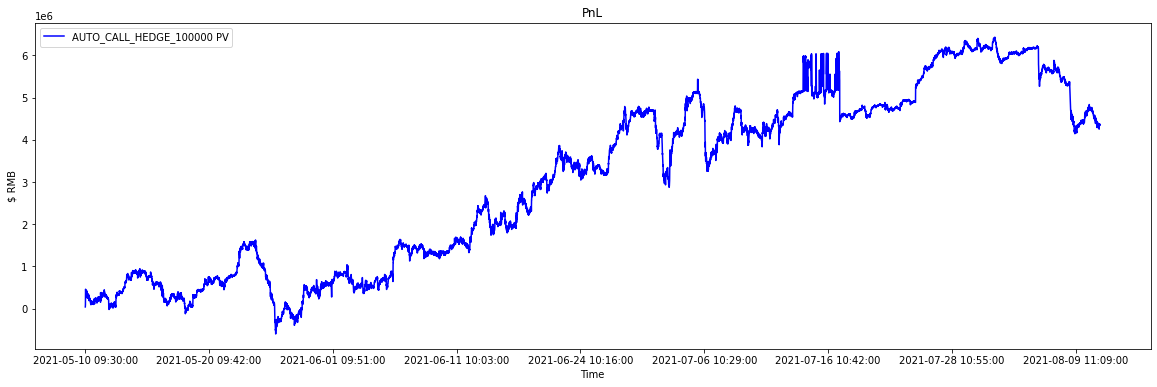

In [13]:
plt.figure(figsize=(20, 6))
plt.title("PnL")
plt.plot(ts, np.cumsum(result1[strategy1.tag_pv()].diff(1)),'b', label = strategy1.tag_pv())
plt.xlabel("Time")
plt.ylabel("$ RMB")
plt.legend()
plt.xticks(xticks);